In [229]:
#Run below commented code on the terminal
#conda install -c conda-forge imbalanced-learn
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from rdkit.Chem import AllChem
import warnings
from statistics import mean
from sklearn.metrics import fbeta_score, make_scorer
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd
import math
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import rdkit.Chem.rdMolDescriptors as d
import rdkit.Chem.Fragments as f
import rdkit.Chem.Lipinski as l
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
#from wordcloud import WordCloud

In [230]:
def feature_selection(train):
    train=train.drop(labels=['INDEX'], axis=1)
    
    train['SMILES'] = train['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))
    train['NumAtoms'] = train['SMILES'].apply(lambda x: x.GetNumAtoms())
    train['HeavyAtomCount']=train['SMILES'].apply(lambda x: l.HeavyAtomCount(x))
    train['CalcExactMolWt']=train['SMILES'].apply(lambda x: d.CalcExactMolWt(x))
    train['fr_Al_COO']=train['SMILES'].apply(lambda x: f.fr_Al_COO(x))
    train['HsNumAtoms'] = train["SMILES"].apply(lambda x: Chem.AddHs(x).GetNumAtoms())
    
    
    
    train_features_T = train.T
    train_features_T.shape
    unique_features = train_features_T.drop_duplicates(keep='first').T
    
    correlated_features = set()
    correlation_matrix = train.corr()
    
    for i in range(len(correlation_matrix .columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.9:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)

    #display(correlated_features)

    train=train.drop(labels=correlated_features, axis=1)
    finger=[np.array(AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=124)) for x in train['SMILES']]
    finger=pd.DataFrame(finger)
    finger.columns=['fp_'+str(x) for x in finger.columns]    
    train = pd.concat([train, finger], axis=1, join='inner')
    train=train.drop(labels=['SMILES'], axis=1)
    
    return train

In [231]:
def split_data(df):
    y=np.array(df['ACTIVE'].astype(int))
    #display(y)
    train_df, val_df, train_labels, val_labels=train_test_split(df,y,test_size=0.3,random_state=41,stratify=y)
    return train_df, val_df, train_labels, val_labels


In [232]:
def create_preprocess(df):
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(df[['NumAtoms']])
    df[['NumAtoms']]=imp_mean.transform(df[['NumAtoms']])
    scaler = MinMaxScaler()
    scaler.fit(df[['NumAtoms']])
    df[['NumAtoms']]=scaler.transform(df[['NumAtoms']])
    est = KBinsDiscretizer(n_bins=10, encode='ordinal')
    est.fit(df[['NumAtoms']])
    df[['NumAtoms']]=est.transform(df[['NumAtoms']])
    return df,imp_mean,scaler,est

In [233]:
def apply_preprocess(df,imp_mean,scaler,est):
    df[['NumAtoms']]=imp_mean.transform(df[['NumAtoms']])
    df[['NumAtoms']]=scaler.transform(df[['NumAtoms']])
    df[['NumAtoms']]=est.transform(df[['NumAtoms']])
    return df


In [234]:
def feature_analysis(train_df, val_df, train_labels, val_labels):
    train = pd.read_csv("training_smiles.csv")
    train_df=feature_selection(train)
    train_df, val_df, train_labels, val_labels=split_data(train_df)
    print(train_df['ACTIVE'].mean(axis=0))
    print(train_df['ACTIVE'].std(axis=0))
    plot_x1 = plt.hist(train_df['ACTIVE'], 10)
    print(train_df.groupby(['ACTIVE']).size())
    print('\n')
    print(train_df['NumAtoms'].mean(axis=0))
    print(train_df['NumAtoms'].std(axis=0))
    plot_x1 = plt.hist(train_df['NumAtoms'], 10)
    print(train_df.groupby(['NumAtoms']).size())
    print(train_df['NumAtoms'].mean(axis=0))
    print(train_df['NumAtoms'].std(axis=0))
    plot_x1 = plt.hist(train_df['NumAtoms'], 10)
    print(train_df.groupby(['NumAtoms']).size())
    print('\n')
    print(train_df['HeavyAtomCount'].mean(axis=0))
    print(train_df['HeavyAtomCount'].std(axis=0))
    plot_x1 = plt.hist(train_df['HeavyAtomCount'], 10)
    print(train_df.groupby(['HeavyAtomCount']).size())
    print('\n')
    print(train_df['CalcExactMolWt'].mean(axis=0))
    print(train_df['CalcExactMolWt'].std(axis=0))
    plot_x1 = plt.hist(train_df['CalcExactMolWt'], 10)
    print(train_df.groupby(['CalcExactMolWt']).size())
    print('\n')
    print(train_df['fr_Al_COO'].mean(axis=0))
    print(train_df['fr_Al_COO'].std(axis=0))
    plot_x1 = plt.hist(train_df['fr_Al_COO'], 10)
    print(train_df.groupby(['fr_Al_COO']).size())
    print('\n')
    print(train_df['HsNumAtoms'].mean(axis=0))
    print(train_df['HsNumAtoms'].std(axis=0))
    plot_x1 = plt.hist(train_df['HsNumAtoms'], 10)
    print(train_df.groupby(['HsNumAtoms']).size())
    #heat map (except finger prints)
    Extract_train_df = train_df.loc[:, 'ACTIVE':'HsNumAtoms']
    print('\n')
    sns.heatmap(Extract_train_df.corr(), cmap="Blues")

RDKit WARNING: [20:38:20] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:38:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:39:05] WARNING: not removing hydrogen atom without neighbors


0.002836674840136545
0.05318510426714665
ACTIVE
0.0    103700
1.0       295
dtype: int64


24.55500745228136
5.810789592450538
NumAtoms
2       1
3       3
4       2
5       9
6      12
       ..
96      1
100     1
101     1
106     1
117     1
Length: 90, dtype: int64
24.55500745228136
5.810789592450538
NumAtoms
2       1
3       3
4       2
5       9
6      12
       ..
96      1
100     1
101     1
106     1
117     1
Length: 90, dtype: int64


24.55489206211837
5.810706286102582
HeavyAtomCount
2       1
3       3
4       2
5       9
6      12
       ..
96      1
100     1
101     1
106     1
117     1
Length: 90, dtype: int64


351.13696651722097
82.23172151632383
CalcExactMolWt
41.984857      1
60.032363      1
60.068748      1
74.059246      1
74.084398      1
              ..
1389.901796    1
1421.748941    1
1446.434951    1
1619.575870    1
1766.302831    1
Length: 45927, dtype: int64


0.03492475599788451
0.20123169413578987
fr_Al_COO
0    100666
1      3065
2       236
3   

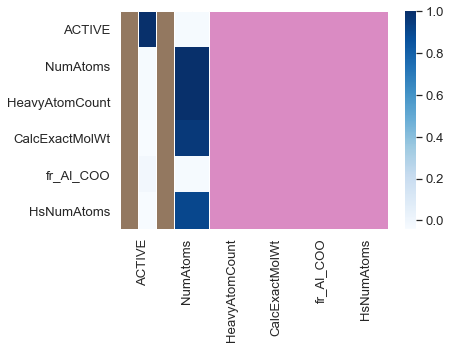

In [167]:
#run only for initial feature analysis
feature_analysis(train_df, val_df, train_labels, val_labels)

In [335]:
#feature selection and splitting the data and preprocessing the data
train = pd.read_csv("training_smiles.csv")
train_df=feature_selection(train)
train_df, val_df, train_labels, val_labels=split_data(train_df)
train_df_cp=train_df.copy()
train_labels_cp=train_labels.copy()
train_df=train_df.drop(labels=['ACTIVE'], axis=1)
testx_df, val_df, testx_labels, val_labels=split_data(val_df)
val_df=val_df.drop(labels=['ACTIVE'], axis=1)
testx_df=testx_df.drop(labels=['ACTIVE'], axis=1)
train_df,imp_mean,scaler,est=create_preprocess(train_df)
val_df=apply_preprocess(val_df,imp_mean,scaler,est)
testx_df=apply_preprocess(testx_df,imp_mean,scaler,est)

RDKit WARNING: [00:51:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [00:51:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [00:52:11] WARNING: not removing hydrogen atom without neighbors


In [236]:
def RandomForest(train_df, val_df, train_labels, val_labels):
    clf = RandomForestClassifier()
    clf.fit(train_df,train_labels)
    proba=clf.predict_proba(val_df)
    print("Test set AUC: {}".format(roc_auc_score(val_labels,proba[:,-1])))
    pred=clf.predict(val_df)
    #print('f1 score ',f1_score(val_labels, pred, average='micro'))
    

In [237]:
#randomforest AUC with default parameters
RandomForest(train_df, val_df, train_labels, val_labels)

Test set AUC: 0.8379771994299858


In [238]:
#from sklearn import tree
def DecisionTree(train_df, val_df, train_labels, val_labels):
    #dt = DecisionTreeClassifier(random_state=0)
    dt=tree.DecisionTreeClassifier()
    dt.fit(train_df,train_labels)
    probb=dt.predict_proba(val_df)
    print("Test set AUC: {}".format(roc_auc_score(val_labels,probb[:,-1])))

In [239]:
#Decision tree AUC with default parameters
DecisionTree(train_df, val_df, train_labels, val_labels)

Test set AUC: 0.5639242954758079


In [225]:
def KNN(train_df, val_df, train_labels, val_labels):
    num_rows, num_cols = train_df.shape
    neigh = KNeighborsClassifier()
    neigh.fit(train_df,train_labels)
    
    probc=neigh.predict_proba(val_df)
    print("Test set AUC: {}".format(roc_auc_score(val_labels,probc[:,-1])))
    

In [226]:
#KNN AUC with default parameters
KNN(train_df, val_df, train_labels, val_labels)

Test set AUC: 0.7191387021517643


In [252]:
def accuracy_of_training_test(train_df, val_df, train_labels, val_labels):
    depth_array=[5,10,15,20,25]
    for depth in depth_array:
        #display(depth)
        clf = RandomForestClassifier(max_depth=depth,class_weight='balanced')
        clf.fit(train_df,train_labels)
        train_pred=clf.predict(train_df)
        test_pred=clf.predict(val_df)
        train_score=accuracy_score(train_labels,train_pred)
        test_score=accuracy_score(val_labels,test_pred)
        print('train score ',train_score*100)
        print('test score ',test_score*100)
    
    
    

In [253]:
#accuracy of training and validation data set with different depths in random forest to determine underfitting or overfitting
accuracy_of_training_test(train_df, val_df, train_labels, val_labels)

train score  87.96384441559691
test score  87.61498765986089
train score  98.31722678974951
test score  97.95826789320171
train score  99.90576470022597
test score  99.6484930072545
train score  99.98846098370115
test score  99.72328172911526
train score  99.9961536612337
test score  99.72328172911526


In [340]:
def cross_val_score_mean(train_df,train_labels):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=41)
    clf = RandomForestClassifier(max_depth=20,n_estimators=200,random_state=0,class_weight='balanced')
    pipeline=make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),KBinsDiscretizer(n_bins=10, encode='ordinal'),clf)
    f1 = cross_val_score(pipeline, train_df, train_labels, scoring = 'f1', cv = cv,n_jobs=-1)
    auc = cross_val_score(pipeline, train_df, train_labels, scoring = 'roc_auc', cv = cv,n_jobs=-1)
    scores = cross_val_score(pipeline, train_df, train_labels, scoring = 'accuracy', cv = cv,n_jobs=-1)
    print(auc)
    print(auc.mean())


In [341]:
#mean score of stratified k fold cross validation
cross_val_score_mean(train_df_cp,train_labels_cp)

[0.80403086 0.73261652 0.77594021 0.71933623 0.71019126 0.70507598
 0.65679181 0.79008912 0.7448093  0.70134174]
0.7340223012890854


In [292]:
def SMOTE_analysis(train_df, val_df, train_labels, val_labels):
    
    X_resampled, y_resampled = BorderlineSMOTE().fit_resample(train_df, train_labels)
    clf = RandomForestClassifier(max_depth=10,n_estimators=200,random_state=0,class_weight='balanced').fit(X_resampled,y_resampled)
    probd=clf.predict_proba(val_df)
    print("Test set AUC: {}".format(roc_auc_score(val_labels,probd[:,-1])))

In [293]:
#SMOTE oversampling to check if balancing class labels help
SMOTE_analysis(train_df, val_df, train_labels, val_labels)

Test set AUC: 0.8851227859643859


In [296]:
def tuning_RandomForest(train_df, val_df, train_labels, val_labels):
    clf = RandomForestClassifier(max_depth=10,n_estimators=200,random_state=0,class_weight='balanced')
    clf.fit(train_df,train_labels)
    proba=clf.predict_proba(val_df)
    pred=clf.predict(val_df)
    print("Test set AUC: {}".format(roc_auc_score(val_labels,proba[:,-1])))
    #print("Test set score: {}".format(clf.score(val_df,val_labels)))

In [297]:
#tuning the randome forest hyper parameters for better estimate
tuning_RandomForest(train_df, val_df, train_labels, val_labels)

Test set AUC: 0.8968980803467455


In [300]:
def AUC_Holdoutset_RandomForest(train_df, val_df, train_labels, val_labels):
    clf = RandomForestClassifier(max_depth=10,n_estimators=200,random_state=0,class_weight='balanced')
    clf.fit(train_df,train_labels)
    proba=clf.predict_proba(testx_df)
    prob=clf.predict(testx_df)
    print("Test set AUC: {}".format(roc_auc_score(testx_labels,proba[:,-1])))
    #print("Test set score: {}".format(clf.score(testx_df,testx_labels)))
    

In [301]:
#Estimated AUC of the holdout set
AUC_Holdoutset_RandomForest(train_df, testx_df, train_labels, testx_labels)

Test set AUC: 0.8729715868664651


In [315]:
def final_predictions(train_df, val_df, train_labels, val_labels):
    testy_df = pd.read_csv("test_smiles.csv")
    testy_df=testy_df.drop(labels=['INDEX'], axis=1)
    
    testy_df['SMILES'] = testy_df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))
    testy_df['NumAtoms'] = testy_df['SMILES'].apply(lambda x: x.GetNumAtoms())
    testy_df['fr_Al_COO']=testy_df['SMILES'].apply(lambda x: f.fr_Al_COO(x))
    finger=[np.array(AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=124)) for x in testy_df['SMILES']]
    finger=pd.DataFrame(finger)
    finger.columns=['fp_'+str(x) for x in finger.columns]    
    testy_df = pd.concat([testy_df, finger], axis=1, join='inner')
    testy_df=testy_df.drop(labels=['SMILES'], axis=1)
    testy_df=apply_preprocess(testy_df,imp_mean,scaler,est)
    
    clf = RandomForestClassifier(max_depth=10,n_estimators=200,random_state=0,class_weight='balanced')
    clf.fit(train_df,train_labels)
    probn=clf.predict_proba(testy_df)[:,1]
    display(testy_df)
    #testy_df=apply_preprocess(testy_df,imp_mean,scaler,est)
    #probd=clf.predict_proba(val_df)
    #probn=clf.predict_proba(feature_selection(test_df))
    #print("Test set AUC: {}".format(roc_auc_score(val_labels,probn[:,-1])))
    #display(probn)
    return probn

In [328]:
#final predictions to output text file

res=final_predictions(train_df, val_df, train_labels, val_labels)
res=np.concatenate(([0.8729715868664651],res))
np.savetxt('20.txt',res)

,NumAtoms,fr_Al_COO,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,...,fp_114,fp_115,fp_116,fp_117,fp_118,fp_119,fp_120,fp_121,fp_122,fp_123
0,1.0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1
1,2.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,8.0,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,1,1,0,1,0
3,2.0,0,0,0,0,1,0,1,1,1,...,0,1,0,0,0,0,1,0,1,0
4,1.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49517,7.0,0,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
49518,7.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
49519,4.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
49520,0.0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
